<a href="https://colab.research.google.com/github/sanda-avram/BERT/blob/main/FillMask/ROST_FillMask_%20RabotaRu_HRBert-mini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets

In [24]:
from datasets import Dataset
import pandas as pd
train_df=messages = pd.read_csv('trainSet1.csv', sep=',', names=["label", "text"])
test_df=messages = pd.read_csv('testSet1.csv', sep=',', names=["label", "text"])


train_ds = Dataset.from_pandas(train_df, split="train")
test_ds = Dataset.from_pandas(test_df, split="test")

model_name = "RabotaRu/HRBert-mini"

In [ ]:
!pip install transformers

In [25]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained(model_name)

loading file tokenizer.json from cache at /root/.cache/huggingface/hub/models--RabotaRu--HRBert-mini/snapshots/5a941ea031c513dec885ae38829963c0899066e5/tokenizer.json
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at /root/.cache/huggingface/hub/models--RabotaRu--HRBert-mini/snapshots/5a941ea031c513dec885ae38829963c0899066e5/special_tokens_map.json
loading file tokenizer_config.json from cache at /root/.cache/huggingface/hub/models--RabotaRu--HRBert-mini/snapshots/5a941ea031c513dec885ae38829963c0899066e5/tokenizer_config.json


In [26]:
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=256)

train_dataset = train_ds.map(tokenize_function, batched=True)
test_dataset = test_ds.map(tokenize_function, batched=True)

  0%|          | 0/6 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [27]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=10)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--RabotaRu--HRBert-mini/snapshots/5a941ea031c513dec885ae38829963c0899066e5/config.json
Model config RobertaConfig {
  "_name_or_path": "RabotaRu/HRBert-mini",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "emb_size": 384,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 384,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9"
  },
  "initializer_range": 0.02,
  "intermediate_size": 512,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6,
    "LABEL_7": 7,
    "LABEL_8": 8,
    "LABEL_9": 9
  },
  "layer_norm_eps":

loading weights file pytorch_model.bin from cache at /root/.cache/huggingface/hub/models--RabotaRu--HRBert-mini/snapshots/5a941ea031c513dec885ae38829963c0899066e5/pytorch_model.bin
Some weights of the model checkpoint at RabotaRu/HRBert-mini were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from

In [ ]:
!pip install evaluate


In [28]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="testTrainer", evaluation_strategy="epoch")

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [30]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

OutOfMemoryError: ignored

In [23]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `XLMRobertaXLForSequenceClassification.forward` and have been ignored: text. If text are not expected by `XLMRobertaXLForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 5411
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 2031
  Number of trainable parameters = 3482511370


OutOfMemoryError: ignored

In [11]:
trainer.evaluate(trainer.eval_dataset)

The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 1421
  Batch size = 8


{'eval_loss': 0.8107583522796631,
 'eval_accuracy': 0.8479943701618579,
 'eval_runtime': 6.0447,
 'eval_samples_per_second': 235.084,
 'eval_steps_per_second': 29.447,
 'epoch': 3.0}

In [12]:
predicted=trainer.predict(test_dataset)

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 1421
  Batch size = 8


In [13]:
c=0
y=[]
for v in predicted.predictions:
  c+=1

  max = v[0]
  index = 0
  for i in range(1,len(v)):
    if v[i] > max:
      max = v[i]
      index = i
  y.append(index)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm=confusion_matrix(test_dataset['label'], y)
print(cm)
accuracy = accuracy_score(test_dataset['label'], y)
print("accuracy:", accuracy)
# Calculate macro-accuracy
#macro_accuracy = np.mean(np.diag(cm))

#print("Macro-accuracy:", macro_accuracy/10)
from sklearn.metrics import classification_report

print(classification_report(test_dataset['label'], y, digits=3))

[[ 56   5   0   0   4   3   0   0   0   6]
 [  2 155   1  23   5   0   0   0  30   0]
 [  0  10 207   8   1   0   1   5   4   6]
 [  1   5   0  73   0   6   0   0   0   1]
 [  0   0   0   0  33   0   0   0   0   1]
 [  2   1   0   5   0 172   0   0   0   5]
 [  0   0   0   0   2   0  22   1   0   0]
 [  0   0   0   0   0   0   0  74   3   0]
 [  1   3   0   2  16   0   0   0 144  10]
 [  0   0   1   7   9  13   1   2   4 269]]
accuracy: 0.8479943701618579
              precision    recall  f1-score   support

           0      0.903     0.757     0.824        74
           1      0.866     0.718     0.785       216
           2      0.990     0.855     0.918       242
           3      0.619     0.849     0.716        86
           4      0.471     0.971     0.635        34
           5      0.887     0.930     0.908       185
           6      0.917     0.880     0.898        25
           7      0.902     0.961     0.931        77
           8      0.778     0.818     0.798       176

In [15]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(test_dataset['label'], y)

0.8617182171043009

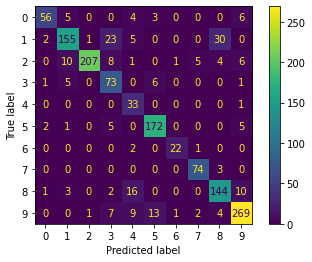

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
 

In [ ]:
!kill 7123
%reload_ext tensorboard
%tensorboard --logdir ./testTrainer/
